# Gaussian Graphical models


In [1]:
import numpy as np
from sklearn.covariance import GraphicalLasso
import matplotlib.pyplot as plt
import networkx as nx


In [1]:
!pip install skggm

  Using cached skggm-0.2.8.tar.gz (191 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\cw2019\AppData\Local\Temp\pip-install-68mbrlmm\skggm_2ec4cda5417641e0a707305e4d4e746d\setup.py", line 5, in <module>
          from Cython.Build import cythonize
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Basic theory - covariance and precision matrix 

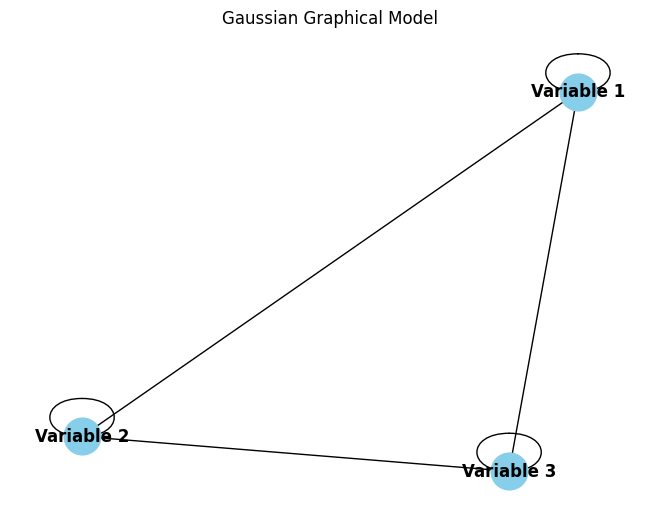

In [4]:

# Generate synthetic data with three variables
np.random.seed(42)
data = np.random.multivariate_normal(mean=[0, 0, 0], cov=[[1, 0.5, 0.2], [0.5, 1, 0.3], [0.2, 0.3, 1]], size=100)

# Fit the Graphical Lasso model
model = GraphicalLasso(alpha=0.01)  # Adjust the regularization parameter as needed
model.fit(data)

# Get the precision matrix (inverse covariance matrix)
precision_matrix = model.precision_

# Plot the graph
graph = nx.from_numpy_array(precision_matrix)
labels = {i: f"Variable {i+1}" for i in range(len(graph.nodes))}
pos = nx.spring_layout(graph)  # You can use other layout options

nx.draw(graph, pos, with_labels=True, labels=labels, font_weight='bold', node_size=700, node_color='skyblue')
plt.title("Gaussian Graphical Model")
plt.show()